In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

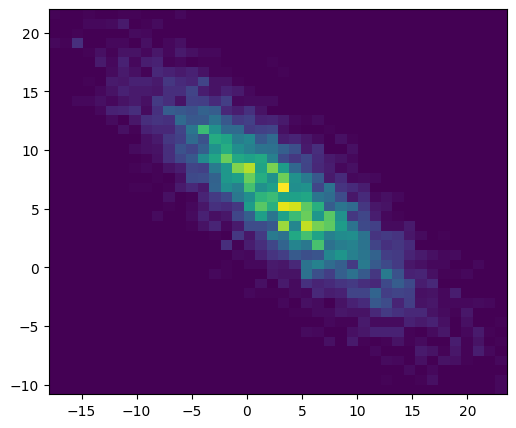

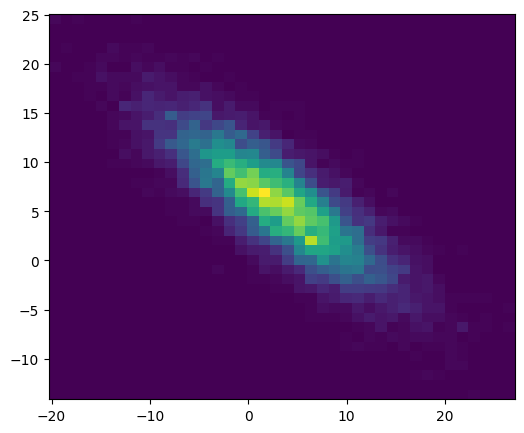

In [53]:
# Задание 5. Методом Метрополиса — Гастингса постройте выборку из двумерного гауссовского распределения 
#со средним (3, 6) и ковариационной матрицей B = [[40, -26], [-26, 25]]. 
#Сравните плоность по выборке (двумерную гистограмму) и теоретическую плотность.

def metroplis(start, value, proposal, niter, nburn=0, **kwargs): #начальное состояние (start) плотностm в точке (fvalue) выбор нового (fproposal) итераций (niter)
    '''Generic Metropolis scheme.

    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append([current[0], current[1]])
    return post[nburn:]
#функцию, вычисляющую значение плотности в произвольной точке (функция value)
def value(point, sred, disp):
    var = multivariate_normal(mean=sred, cov=disp)
    return var.pdf(point)
#функцию, предлагающую выбор нового состояния (функция proposal)
def proposal(current, disp, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    disp = np.asarray(disp)
    A = np.linalg.cholesky(disp)
    return current + A @ np.random.randn(*current.shape)

sr = np.array([3,6])
srr = ([[3],[6]])
di = np.array([[40, -26], [-26, 25]])
A = np.linalg.cholesky(di)
post = metroplis([0,0], value, proposal, 10000, nburn=0, sred = sr, disp = di)
samples = A @ np.random.randn(2, 10000) + srr #теоретическая выборка по методу из дз 6
postarr = np.array(post)
plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
plt.hist2d(postarr[:, 0], postarr[:, 1], bins=40)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
h, x, y, _ = ax.hist2d(*samples, bins=40)
ax.set_aspect('equal')

plt.show()

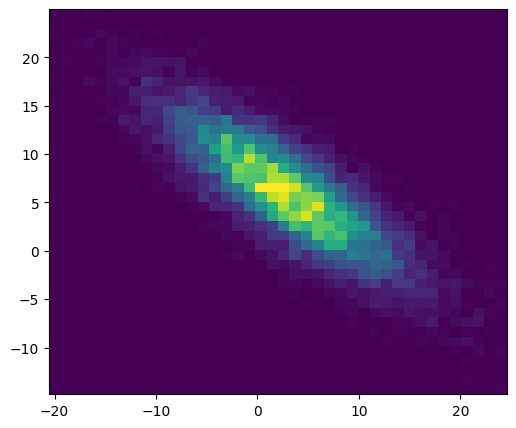

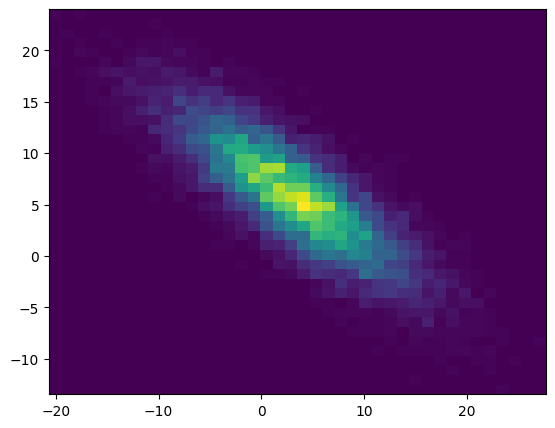

In [61]:
#Задание 6. Решите задачу 5 методом cэмплирования по Гиббсу.
def samplir(nachalo, d):
    samp = []
    samp.append(nachalo)
    for i in range (1,d): #теперь для всех компонент совместной плотности сэмплируем по одномерным гауссовским плотностям
        y = np.random.normal(6 - (26/40)*(samp[i-1][0]-3), np.sqrt(25 - 26**2/40))
        x = np.random.normal(3 - (26/25)*(y-6), np.sqrt(40 - 26**2/25))
        elem = [x, y]
        samp.append(elem)
    return samp

sr = np.array([3,6])
srr = ([[3],[6]])
di = np.array([[40, -26], [-26, 25]])
A = np.linalg.cholesky(di)
postt = samplir([0,0],10000)
samples = A @ np.random.randn(2, 10000) + srr #теоретическая выборка по методу из дз 6

postarr = np.array(postt)
plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
plt.hist2d(postarr[:, 0], postarr[:, 1], bins=40)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
h, x, y, _ = ax.hist2d(*samples, bins=40)
ax.set_aspect('equal')

plt.show()

In [70]:
# Задание 1. Выберите произвольное начальное состояние ("sunny", "cloudy" или "rainy") 
#Cмоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. 
#Результат моделирования (массив размера 20000) запишите в переменную states.

state_wheather = ("sunny", "cloudy", "rainy")
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))
transition_name = [["ss","sc","sr"],["cs","cc","cr"],["rs","rc","rr"]]

states = []
states.append(np.random.choice(state_wheather, size = 1)[0])
for i in range(1,20001):
    if states[i-1] == "sunny":
      elem = np.random.choice(state_wheather, size=1, p=transition_matrix[0])
      states.append(elem[0])
    if states[i-1] == "cloudy":
      elem = np.random.choice(state_wheather, size=1, p=transition_matrix[1])
      states.append(elem[0])
    if states[i-1] == "rainy":
      elem = np.random.choice(state_wheather, size=1, p=transition_matrix[2])
      states.append(elem[0])
print(states)

['cloudy', 'cloudy', 'rainy', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'sunny', 'cloudy', 'rainy', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'rainy', 'sunny', 'rainy', 'rainy', 'cloudy', 'sunny', 'sunny', 'cloudy', 'sunny', 'sunny', 'sunny', 'rainy', 'sunny', 'cloudy', 'sunny', 'sunny', 'cloudy', 'rainy', 'rainy', 'sunny', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'cloudy', 'sunny', 'sunny', 'cloudy', 'cloudy', 'rainy', 'rainy', 'sunny', 'sunny', 'rainy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'rainy', 'cloudy', 'rainy', 'rainy', 'cloudy', 'sunny', 'rainy', 'rainy', 'rainy', 'rainy', 'cloudy', 'rainy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'rainy', 'rainy', 'cloudy', 'sunny', 'sunny', '

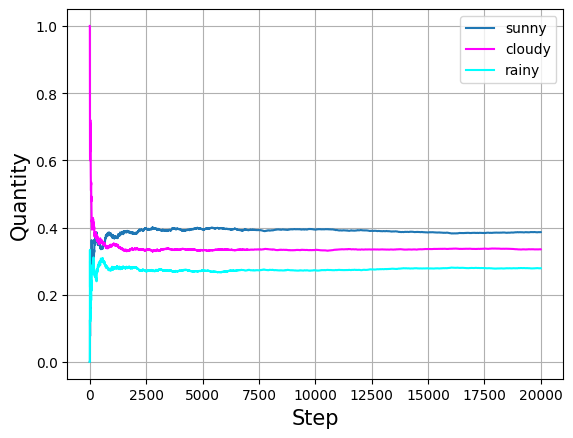

In [92]:
# Задание 2. На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. 
#На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды. 

sun = []
clou = []
rai = []
i = 0
j = 0
k = 0
for h in range(1,20001):
    if states[h-1] == 'sunny': 
        i = i+1
    sun.append(i)

for h in range(1,20001):
    if states[h-1] == 'cloudy': 
        j = j+1
    clou.append(j)

for h in range(1,20001):
    if states[h-1] == 'rainy': 
        k = k+1
    rai.append(k)

plt.plot(np.arange(1, 20001, step=1), sun/np.arange(1, 20001, step=1) , label='sunny')
plt.plot(np.arange(1, 20001, step=1), clou/np.arange(1, 20001, step=1), label='cloudy', c='magenta')
plt.plot(np.arange(1, 20001, step=1), rai/np.arange(1, 20001, step=1), label='rainy', c='aqua')
plt.xlabel('Step', fontsize=15)
plt.ylabel('Quantity', fontsize=15)
#plt.xticks(np.arange(1, 20000, step=1),fontsize=3)
plt.grid()
plt.legend()
plt.show()

In [102]:
#Задание 3. Как следует из картинки, частоты сходятся к некоторым стационарным значениям. 
#Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей, а вектор π - искомая стационарная плотность. 
#Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

identity_matrix = np.eye(3)
for_solve = (identity_matrix - transition_matrix).transpose()
#как на занятии меняем чтобы система не была вырожденной:
vector = ([[0],[0],[1]])
for_solve[2] = [1,1,1]
stat = np.linalg.solve(for_solve, vector)
print(stat) #совпадают, как видно из графика
from numpy.linalg import matrix_power 
print(np.linalg.matrix_power(transition_matrix, 200)[0]) #

[[0.38888889]
 [0.33333333]
 [0.27777778]]
[0.38888889 0.33333333 0.27777778]
